In [12]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

In [112]:
df = pd.read_csv("commons-lang-stats.csv")
df.head()

,project,datapoint,n_commits,n_files,n_files_updated_i,shared_files
0,commons-lang,10496897d06a68cd9555ae5368bd1889b7dfa862_e8054...,2,3,2,0
1,commons-lang,10496897d06a68cd9555ae5368bd1889b7dfa862_b2f17...,3,24,22,1
2,commons-lang,10496897d06a68cd9555ae5368bd1889b7dfa862_b2bba...,4,29,7,3
3,commons-lang,b2f1757bf9ec1632a940b9a2e65a1a022ba54af8_b2bba...,2,19,7,2
4,commons-lang,7f89bd4850b7a5b0dd2a10d2f2daa62805de5bca_7e512...,2,3,2,0


# Tangled Files in Synthetic Commits

In [123]:
pd.options.display.float_format = '{:.2%}'.format

In [124]:
df.drop(['project', 'datapoint', 'n_commits', 'n_files', 'n_files_updated_i'], axis=1)['shared_files'].value_counts(normalize=True)

0     41.96%
1     28.70%
2     15.04%
3      6.71%
4      2.56%
5      1.92%
6      0.64%
7      0.49%
10     0.44%
8      0.25%
17     0.20%
14     0.20%
13     0.15%
23     0.10%
258    0.10%
9      0.10%
11     0.10%
16     0.05%
188    0.05%
29     0.05%
19     0.05%
20     0.05%
33     0.05%
28     0.05%
Name: shared_files, dtype: float64

In [125]:
df.drop(['project', 'datapoint', 'n_files', 'n_files_updated_i'], axis=1).groupby('n_commits', sort=True)\
    .value_counts(normalize=True)

n_commits  shared_files
2          0              62.71%
           1              28.36%
           2               5.88%
           3               1.58%
           4               0.56%
           5               0.34%
           28              0.11%
           10              0.11%
           8               0.11%
           7               0.11%
           6               0.11%
3          0              33.85%
           1              30.91%
           2              20.40%
           3               7.57%
           4               2.01%
           5               1.70%
           10              0.62%
           6               0.46%
           8               0.46%
           14              0.31%
           13              0.31%
           258             0.15%
           188             0.15%
           33              0.15%
           23              0.15%
           19              0.15%
           16              0.15%
           9               0.15%
           7       

In [58]:
q = df["shared_files"].quantile(0.99)
df_no_out = df[df["shared_files"] < q]

<Axes: xlabel='shared_files', ylabel='Count'>

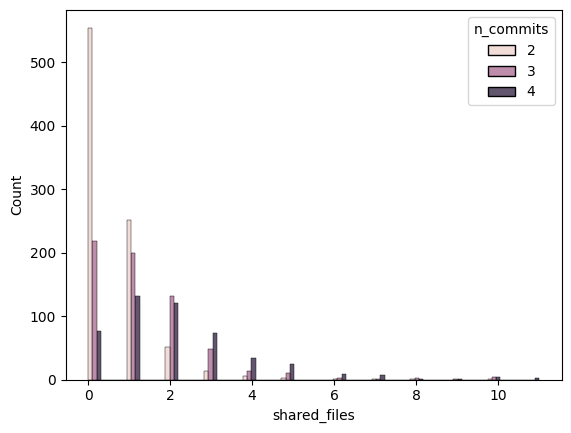

In [59]:
sns.histplot(df_no_out, x='shared_files', hue='n_commits', multiple="dodge")

In [126]:
df.drop(['project', 'datapoint', 'n_files', 'n_files_updated_i', 'shared_files'], axis=1).value_counts\
    (normalize=True)

n_commits
2           43.64%
3           31.90%
4           24.46%
dtype: float64